### Speech Processing Analysis & Machine Learning & Ensemble Modelling




In [ ]:
!pip install spafe
!pip install pip install scikit-plot

     |████████████████████████████████| 77 kB 3.7 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
for i in os.listdir("/content/drive/MyDrive/archive (1)/augmented_dataset/"):
    print(str(len(os.listdir("/content/drive/MyDrive/archive (1)/augmented_dataset/"+i))) +" "+ i +" audios")

1356 bed audios
1357 bird audios
1424 cat audios
1198 down audios
1498 dog audios
1133 eight audios
1092 five audios
960 go audios
2400 four audios
1481 happy audios
1505 left audios
2392 house audios
1253 marvel audios
1144 nine audios
1002 no audios
2244 off audios
2228 on audios
1276 one audios
1296 right audios
1411 seven audios
1485 six audios
1463 sheila audios
1188 three audios
1485 stop audios
1188 tree audios
902 two audios
1187 up audios
957 wow audios
1244 yes audios
1306 zero audios


In [ ]:
import os
for i in os.listdir("/content/drive/MyDrive/archive (1)/augmented_dataset_verynoisy/"):
    print(str(len(os.listdir("/content/drive/MyDrive/archive (1)/augmented_dataset_verynoisy/"+i))) +" "+ i +" audios")

1489 dog audios
1402 cat audios
1113 eight audios
1223 down audios
1112 five audios
960 go audios
2400 four audios
1481 happy audios
2392 house audios
1485 left audios
1253 marvel audios
1145 nine audios
963 no audios
2252 off audios
2228 on audios
1276 one audios
1276 right audios
1411 seven audios
1463 sheila audios
1500 six audios
1485 stop audios
2028 three audios
2072 tree audios
902 two audios
1187 up audios
957 wow audios
1547 yes audios
1602 zero audios
1367 bed audios
1366 bird audios


In [ ]:
import os
for i in os.listdir("/content/drive/MyDrive/speech_commands_v0.01/"):
    print(str(len(os.listdir("/content/drive/MyDrive/speech_commands_v0.01/"+i))) +" "+ i +" audios")

2357 five audios
2352 eight audios
2372 four audios
2372 go audios
1742 happy audios
1750 house audios
2353 left audios
1746 marvin audios
2365 nine audios
1881 no audios
2357 off audios
2392 on audios
2370 one audios
2367 right audios
2392 seven audios
1734 sheila audios
2387 six audios
2390 stop audios
2346 three audios
1733 tree audios
2373 two audios
1745 wow audios
2387 yes audios
2376 up audios
2376 zero audios
1713 bed audios
1731 bird audios
1733 cat audios
2359 down audios
1746 dog audios


### Comparison of Original and Noisy dataset

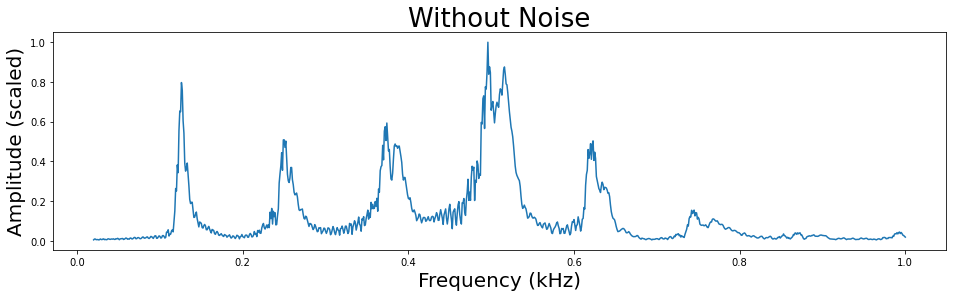

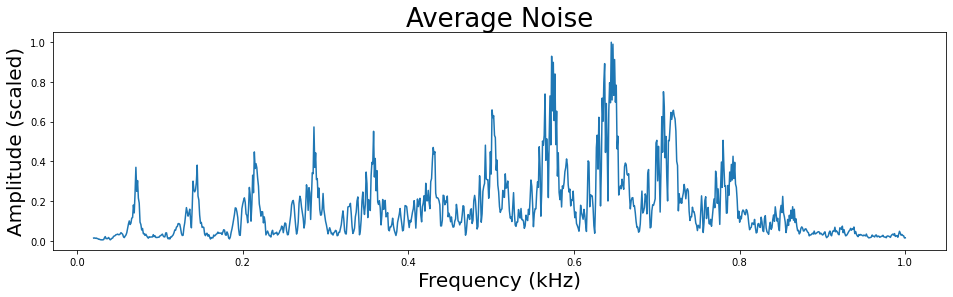

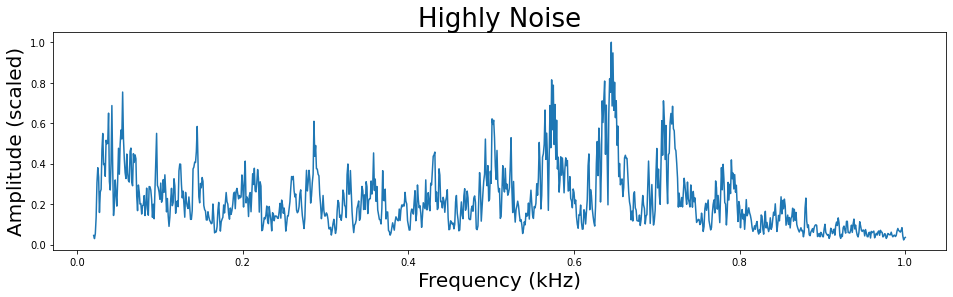

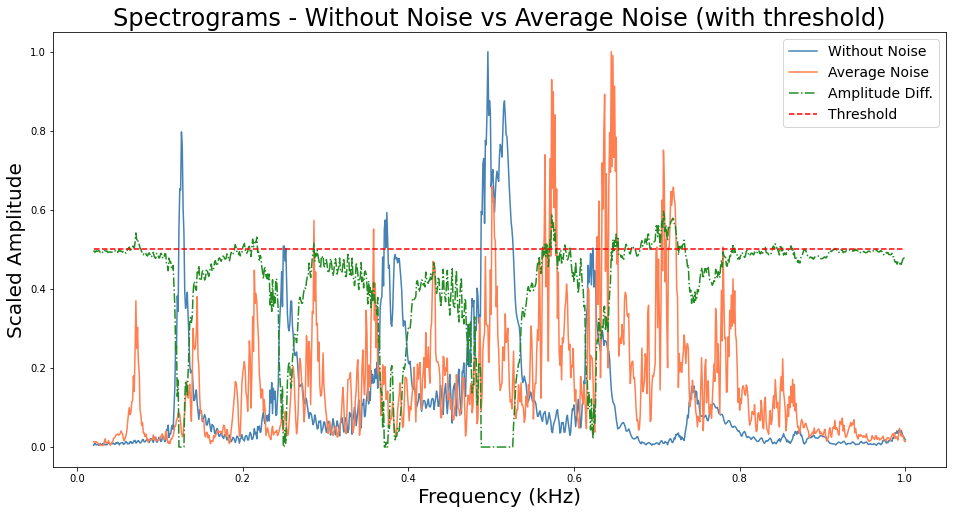

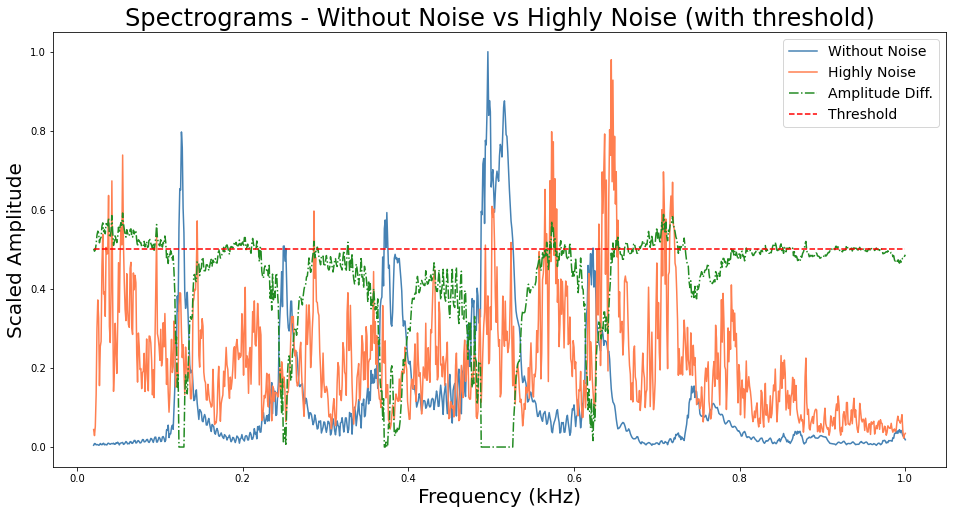

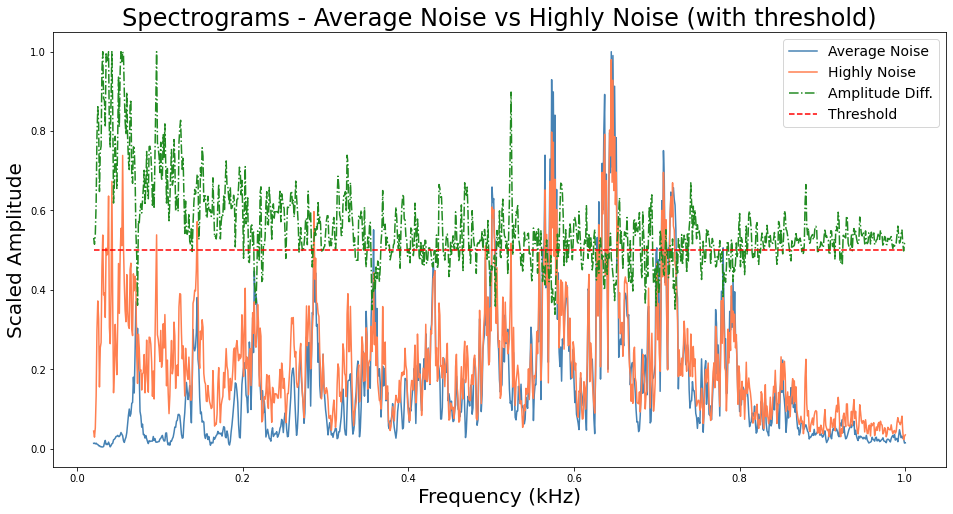

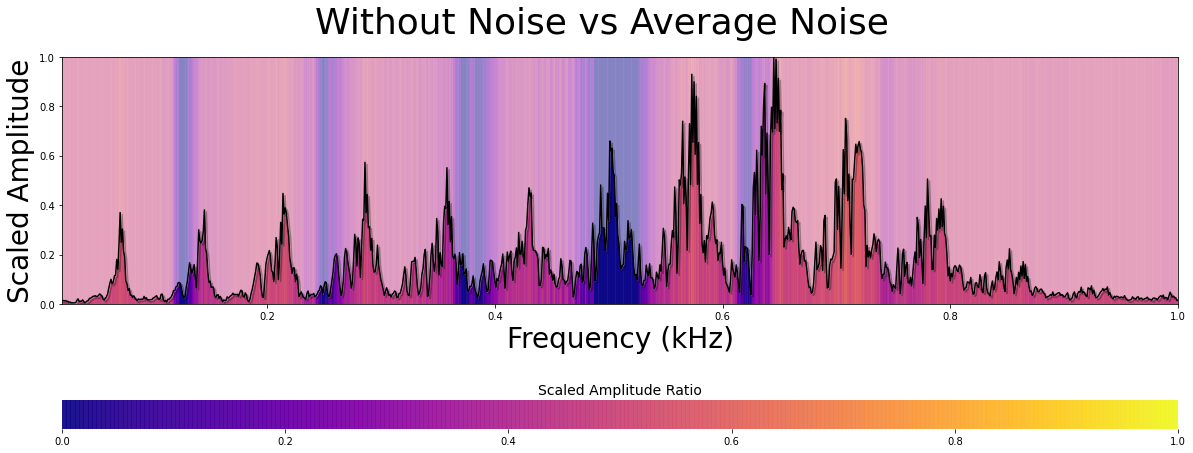

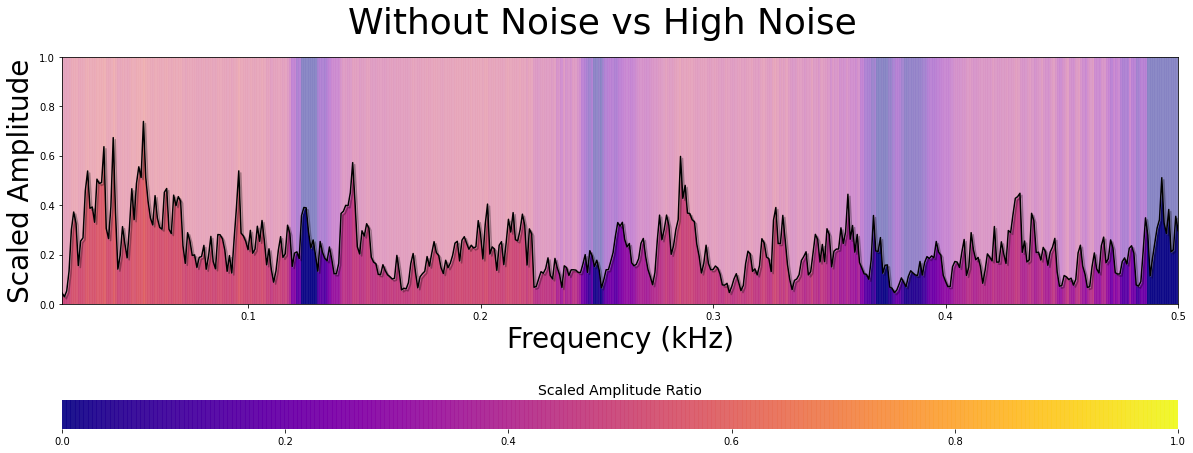

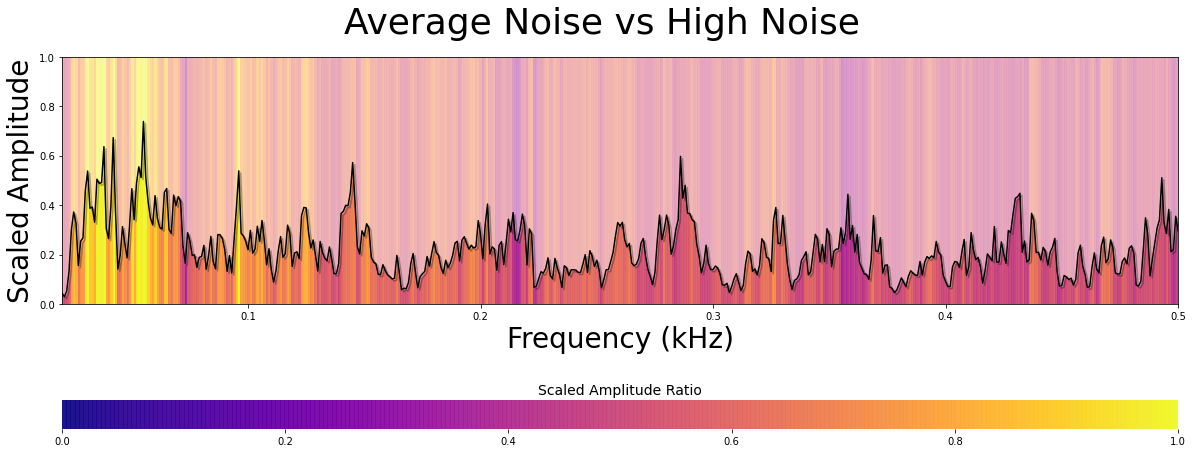

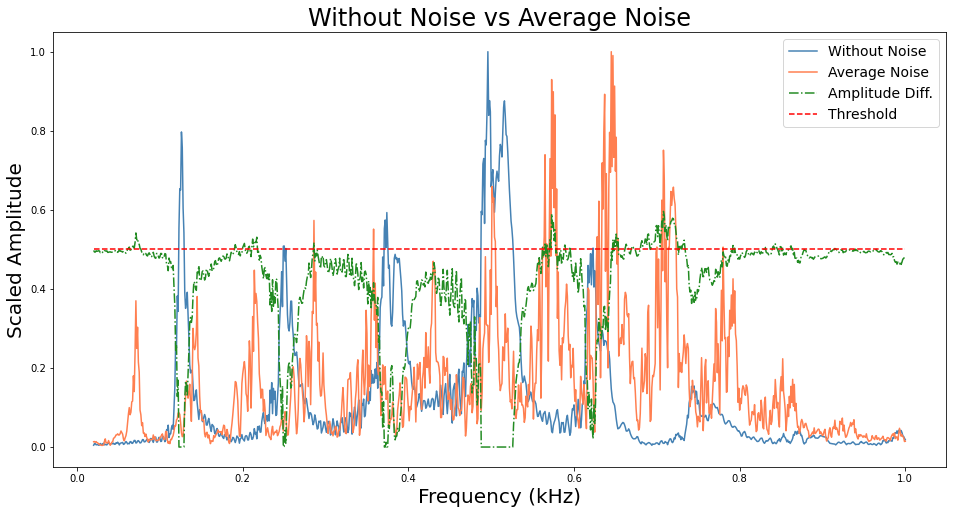

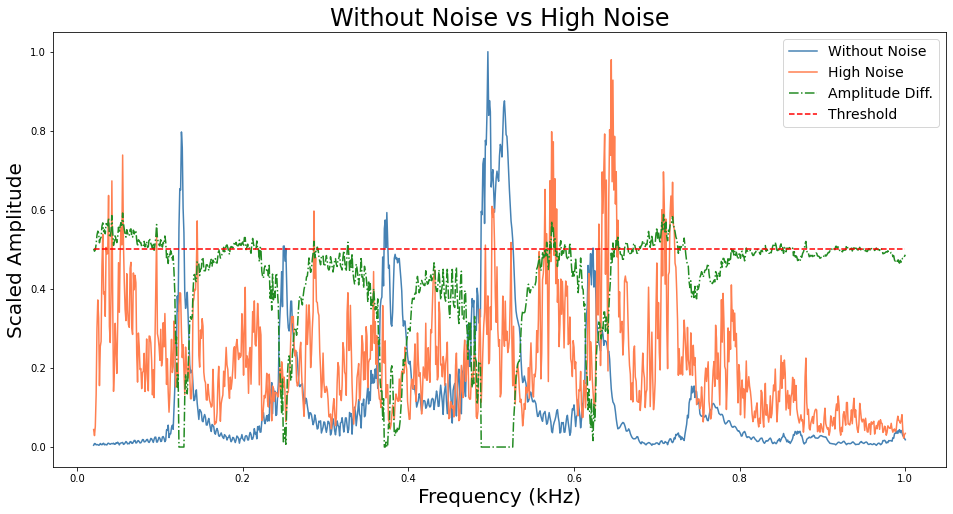

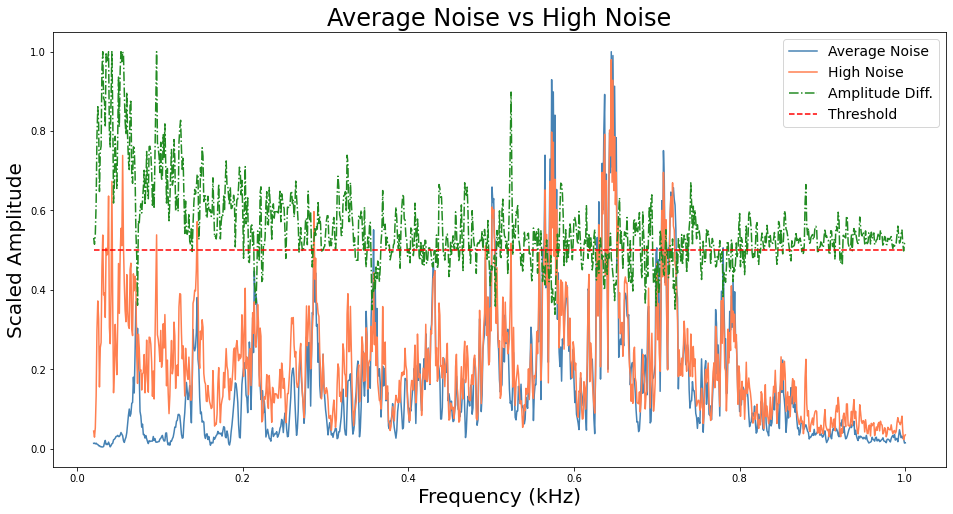

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

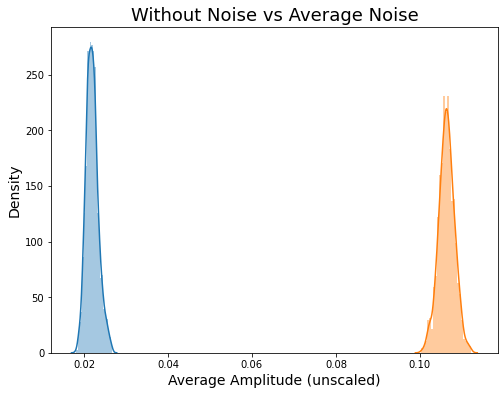

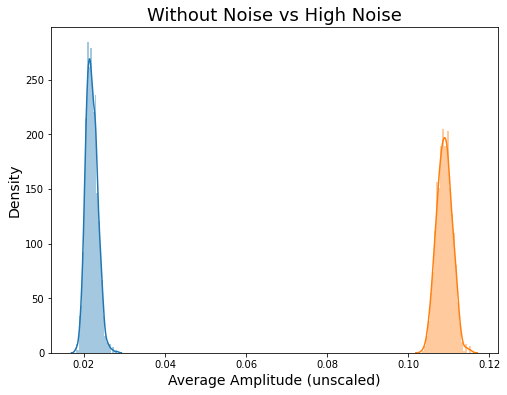

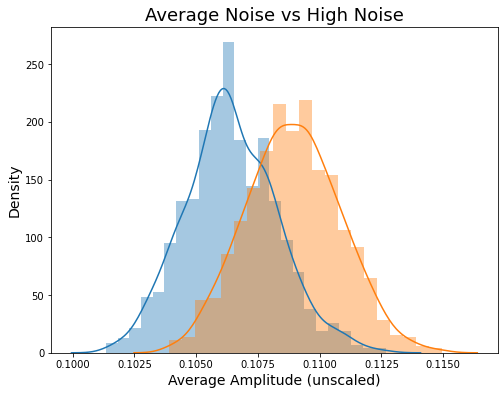

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


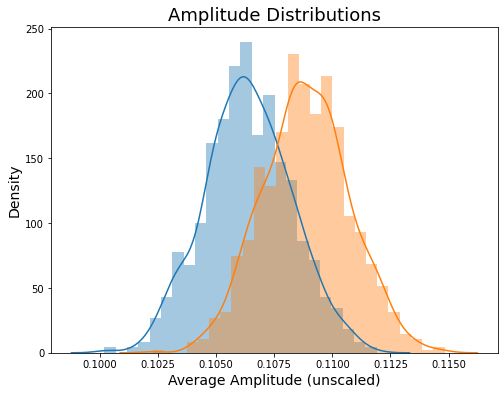

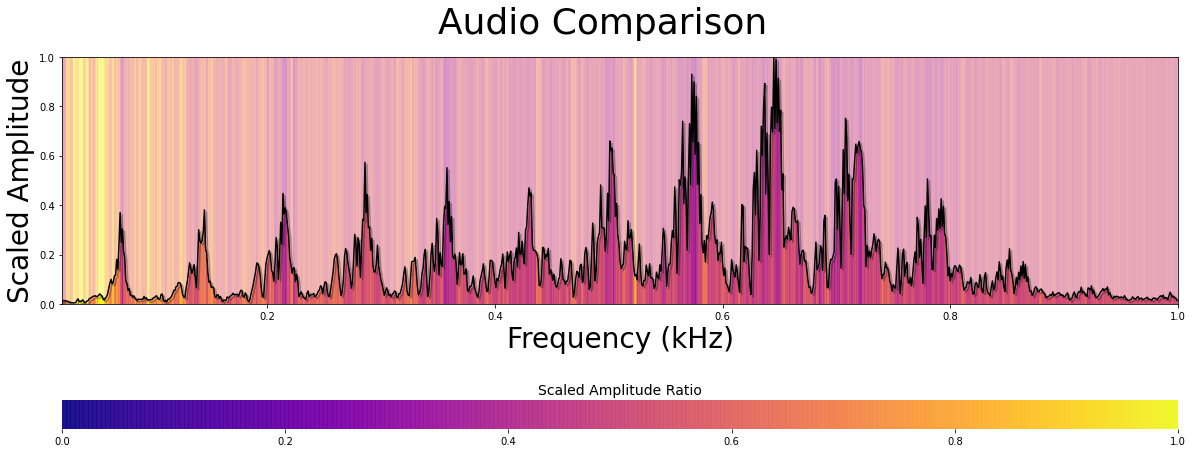

In [ ]:
"""
IMPORTS
"""

import pdb

import librosa
from librosa.feature import chroma_stft
import librosa.display

import numpy as np
import pandas as pd

from scipy.stats import ttest_ind

import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

import seaborn as sns

"""
AUDIO ANALYZER CLASS
==========================================================================================================
"""

class AudioAnalyzer:

    def __init__(self, filename, fft_size=256, input_sr=41000, analyze=True):
        """
        Loads in and transform sample data from an audio file into a pandas dataframe for analysis and graphing

        Input:
            filename: relative path to audio file
            fft_size: The number of frequency bins for the fft analysis. Defaults to 256
            input_sr: the sample rate of the input audio file. Defaults to 41000
        """
        y, sr = librosa.load(filename, sr=input_sr)
        self.y = y
        self.sr = sr
        self.fft_size = fft_size
        if analyze:
            self.spectrum_analysis()

    def change_fft_bin_size(self, size):
        """
           Optionally changes the number of fft bins after initialization.
        """
        self.fft_size = size
        self.spectrum_analysis()

    def spectrum_analysis(self):
        """
        Runs spectrum analysis on the input audio file. Sets and returns a dataframe with frequency information across all fft bins.
        Amplitudes are averaged at each frequency.
        Note: This method must be called before any analysis or plotting can be done on the class instance.
        """
        self.df = pd.DataFrame(np.abs(librosa.stft(self.y, n_fft=self.fft_size)))

        bins = librosa.fft_frequencies(sr=self.sr, n_fft=self.fft_size)

        self.df['bins'] = bins / 1000. # divide by 1000 lets us display in kHz

        self.df['average_amplitude'] = self.df.mean(axis=1)
        self.df = self.df[['bins', 'average_amplitude']]
        return self.df

    def plot_spectrum(self, min_freq=0, max_freq=None, fill=False, title="Spectrogram - Average Frequency"):

        """
        Plots a single spectrogram of averaged frequencies across all fft bins. Uses the generated dataframe as the source.
        """

        max_freq = max_freq or 20000.
        window = self.df.loc[(self.df.bins * 1000. >= min_freq) & (self.df.bins * 1000. <= max_freq)].copy()
        window['scaled_amplitude'] = np.interp(window.average_amplitude, (0., max(window.average_amplitude)), (0., 1.))
        window.plot(x='bins', y='scaled_amplitude', figsize=(16,4))
        if fill:
            plt.fill_between(self.df.bins, self.df.average_amplitude)

        legend = plt.legend()
        legend.remove()
        plt.xlabel("Frequency (kHz)", fontsize=20)
        plt.ylabel("Amplitude (scaled)", fontsize=20)
        plt.title(title, fontsize=26)



"""
SIGNAL COMPARE CLASS
==========================================================================================================
"""


class SpectrumCompare():

    def __init__(self, original, modified):
        """
        Compares the frequency and amplitude information of two AudioAnalyzer class instances.

        Input:
            original, modified: the two AudioAnalyzer class instances.
        """
        self.original_df = original.df
        self.modified_df = modified.df

        self.dfs = [self.original_df, self.modified_df]

        self.get_max_average(self)
        self.scale_amplitudes(self)
        self.get_ratio_df(self)

    def plot_spectrum_group(self,
                            spec_1=True,
                            spec_2=True,
                            title="Comparison of Frequency Amplitudes",
                            xlabel="Frequency (kHz)",
                            ylabel="Scaled Amplitude",
                            frange=None,
                            ratio=False,
                            legend=["Spectrum 1", "Spectrum 2", "Signal Diff.", "Threshold"],
                            threshold=False,
                           ):
        """
        Plots a spectrogram comparing the frequencies and relative amplitudes at each fft bin of the two AudioAnalyzer class instances.
        Plots up to four lines:
            first AudioAnalyzer class instance - frequency and amplitude
            Second AudioAnalyzer class instance - frequency and amplitude
            Difference in amplitude at each bin
            Threshold - Shows where the first or second AudioAnlyzer amplitude is greater (relative hot or old spots)
        """

        dfs = self.dfs.copy()
        fig = plt.figure(figsize=(16,8))

        if frange:
            for i, df in enumerate(dfs):
                dfs[i] = df.loc[(df.bins * 1000. >= frange[0]) & (df.bins * 1000. <= frange[1])]
        else:
            dfs = self.dfs


        if spec_1: plt.plot(dfs[0].bins, dfs[0].scaled_amplitude, label=legend[0], c="steelblue")
        if spec_2: plt.plot(dfs[1].bins, dfs[1].scaled_amplitude, label=legend[1], c="coral")

        if ratio:
            if frange:
                ratio_df = self.ratio_df[(self.ratio_df.bins * 1000. >= frange[0]) & (self.ratio_df.bins * 1000. <= frange[1])]
                plt.plot(ratio_df['bins'], ratio_df['scaled_amplitude'], label=legend[2], c="forestgreen", linestyle="-.")
            else:
                plt.plot(self.ratio_df['bins'], self.ratio_df['scaled_amplitude'], label=legend[2], c="forestgreen")

        if threshold and frange:
            plt.plot([frange[0] / 1000, frange[1] / 1000], [0.5, 0.5], linestyle="--", label=legend[3], c="r")

        plt.title(title, fontsize=24)
        plt.xlabel(xlabel, fontsize=20)
        plt.ylabel(ylabel, fontsize=20)
        plt.legend(fontsize=14)

    def plot_spectrum_heatmap(self,
                               plot_spec1=True,
                               frange=[],
                               title="Audio Comparison",
                               cmap="plasma",
                               background_color="white",
                               background_alpha=0.5
                              ):
        """
        Plots a heatmap and spectrogram showing the relative hot and cool spots of thw two compared AudioAnalyzer class instances.
        A number of options are available to customize the appearance of the generated plot.
        """

#       DATAFRAME SETUP
        if plot_spec1:
            df = self.original_df
        else:
            df = self.modified_df

        df['ratio_amplitude'] = self.ratio_df.scaled_amplitude

        df['attenuated_scaled'] = df.scaled_amplitude
        df['boosted_scaled'] = df.scaled_amplitude

        if len(frange):
            plot_df = df.loc[(df.bins >= frange[0] / 1000) & (df.bins <= frange[1] / 1000)]
            ratio_df = self.ratio_df.loc[(self.ratio_df.bins >= frange[0] / 1000) & (self.ratio_df.bins <= frange[1] / 1000)]
        else:
            plot_df = df
            ratio_df = self.ratio_df

#       FIGURE SETUP
        fig = plt.figure(figsize=(20,10))
        ax1 = fig.add_subplot(211, facecolor="white")
        # ax1 = plt.subplot2grid((8,1), (0,0), rowspan=5, facecolor="white", fig=fig)
        ax2 = fig.add_subplot(211, facecolor="#00000000")
        # ax2 = plt.subplot2grid((8,1), (0,0), rowspan=2, facecolor="#00000000", fig=fig)
        # fig2 = plt.figure(figsize=(32, 8))
        # cbaxes = fig2.add_subplot(32,1,1)
        cbaxes = plt.subplot2grid((16,1), (10,0))
        cbaxes.set_title("Scaled Amplitude Ratio", size=14)

#       HEATMAP PLOT
        sns.heatmap(data=ratio_df.set_index('bins').transpose(), cbar=True, cbar_ax=cbaxes, cbar_kws={"orientation" : "horizontal"}, cmap=cmap, alpha=0.95, zorder=1, ax=ax1, vmin=0.0, vmax=1.0)
        ax1.set_xlabel("")
        ax1.set_xticks([])
        ax1.set_ylabel("")
        ax1.set_yticks([])

#       FREQUENCY PLOT
        sns.lineplot(data=plot_df, x="bins", y="scaled_amplitude", color='black', zorder=10, ax=ax2, path_effects=[path_effects.SimpleLineShadow(), path_effects.Normal()])
        ax2.fill_between(x=plot_df.bins, y1=plot_df.scaled_amplitude, color='white', alpha=0.0)
        ax2.fill_between(x=plot_df.bins, y1=plot_df.scaled_amplitude, y2=1.0, color=background_color, alpha=background_alpha)

        ax2.set_xlabel("Frequency (kHz)", size=28)
        ax2.set_ylabel("Scaled Amplitude", size=28)

        ax2.margins(0)
        fig.suptitle(title, size=36, y=0.95)


    def plot_amplitude_distributions(self,
                                    n=10000,
                                    size=1000,
                                    title="Amplitude Distributions",
                                    xlabel="Average Amplitude (unscaled)",
                                    ylabel="Density"
                                    ):
        amp1 = self.dfs[0].scaled_amplitude
        amp2 = self.dfs[1].scaled_amplitude

        samples_1 = []
        samples_2 = []

        for i in range(size):
            samples_1.append(np.random.choice(amp1, size=size).mean())
            samples_2.append(np.random.choice(amp2, size=size).mean())

        plt.figure(figsize=(8,6))

        sns.distplot(samples_1)
        sns.distplot(samples_2)

        plt.title(title, fontsize=18)
        plt.xlabel(xlabel, fontsize=14)
        plt.ylabel(ylabel, fontsize=14)

        t_stat, p_val = ttest_ind(samples_1, samples_2, equal_var=False)
        return pd.DataFrame([[t_stat, p_val]], columns=["T-Statistic", "P-Value"])


    @staticmethod
    def get_max_average(self):
        max_average = 0
        for df in self.dfs:
            cur_max = df.average_amplitude.max()
            max_average = cur_max if cur_max > max_average else max_average

        self.max_average = max_average

    @staticmethod
    def scale_amplitudes(self):
        scaled_dfs = []
        for df in self.dfs:
            averaged = df['average_amplitude']
            df['scaled_amplitude'] = np.interp(averaged, (0., self.max_average), (0., 1.))
            scaled_dfs.append(df)
        self.original_df, self.modified_df = scaled_dfs

    @staticmethod
    def get_ratio_df(self):

        orig_scaled = self.original_df.scaled_amplitude
        mod_scaled = self.modified_df.scaled_amplitude

        self.ratio_df = pd.DataFrame((mod_scaled - orig_scaled) + 0.5)
        self.ratio_df['bins'] = self.original_df.bins

        self.ratio_df.loc[self.ratio_df.scaled_amplitude > 1.0, ['scaled_amplitude']] = 1.0
        self.ratio_df.loc[self.ratio_df.scaled_amplitude < 0.0, ['scaled_amplitude']] = 0.0

def chunk_comparison(inputfile, targetfile1,targetfile2):
    #AudioAnalyzer = AudioAnalyzer()
    withoutnoise = AudioAnalyzer(inputfile, input_sr=44100, fft_size=44100)
    noisy = AudioAnalyzer(targetfile1, input_sr=44100, fft_size=44100)
    verynoisy = AudioAnalyzer(targetfile2, input_sr=44100, fft_size=44100)

    withoutnoise.plot_spectrum(min_freq=20, max_freq=1000, title="Without Noise")
    noisy.plot_spectrum(min_freq=20, max_freq=1000, title="Average Noise")
    verynoisy.plot_spectrum(min_freq=20, max_freq=1000, title="Highly Noise")
    plt.show()

    withoutnoise_to_noisy = SpectrumCompare(withoutnoise, noisy)
    withoutnoise_to_verynoisy = SpectrumCompare(withoutnoise, verynoisy)
    noisy_to_verynoisy = SpectrumCompare(noisy, verynoisy)

    withoutnoise_to_noisy.plot_spectrum_group(frange=(20, 1000),
                                   ratio=True,
                                   threshold=True,
                                   title="Spectrograms - Without Noise vs Average Noise (with threshold)",
                                   legend=("Without Noise", "Average Noise", "Amplitude Diff.", "Threshold")
                                   )
    plt.show()

    withoutnoise_to_verynoisy.plot_spectrum_group(frange=(20, 1000),
                                   ratio=True,
                                   threshold=True,
                                   title="Spectrograms - Without Noise vs Highly Noise (with threshold)",
                                   legend=("Without Noise", "Highly Noise", "Amplitude Diff.", "Threshold")
                                   )
    plt.show()

    noisy_to_verynoisy.plot_spectrum_group(frange=(20, 1000),
                                   ratio=True,
                                   threshold=True,
                                   title="Spectrograms - Average Noise vs Highly Noise (with threshold)",
                                   legend=("Average Noise", "Highly Noise", "Amplitude Diff.", "Threshold")
                                   )
    plt.show()

    withoutnoise_to_noisy.plot_spectrum_heatmap(
        frange=(20, 1000),
        plot_spec1=False,
        title="Without Noise vs Average Noise"
    )
    plt.show()

    withoutnoise_to_verynoisy.plot_spectrum_heatmap(
        frange=(20, 500),
        plot_spec1=False,
        title="Without Noise vs High Noise"
    )
    plt.show()

    noisy_to_verynoisy.plot_spectrum_heatmap(
        frange=(20, 500),
        plot_spec1=False,
        title="Average Noise vs High Noise"
    )
    plt.show()

    withoutnoise_to_noisy.plot_spectrum_group(
        frange=(20, 1000),
        ratio=True,
        threshold=True,
        title="Without Noise vs Average Noise",
        legend=("Without Noise", "Average Noise", "Amplitude Diff.", "Threshold")
    )
    plt.show()

    withoutnoise_to_verynoisy.plot_spectrum_group(
        frange=(20, 1000),
        ratio=True,
        threshold=True,
        title="Without Noise vs High Noise",
        legend=("Without Noise", "High Noise", "Amplitude Diff.", "Threshold")
    )
    plt.show()

    noisy_to_verynoisy.plot_spectrum_group(
        frange=(20, 1000),
        ratio=True,
        threshold=True,
        title="Average Noise vs High Noise",
        legend=("Average Noise", "High Noise", "Amplitude Diff.", "Threshold")
    )
    plt.show()
    withoutnoise_to_noisy.plot_amplitude_distributions(title="Without Noise vs Average Noise")
    withoutnoise_to_verynoisy.plot_amplitude_distributions(title="Without Noise vs High Noise")
    noisy_to_verynoisy.plot_amplitude_distributions(title="Average Noise vs High Noise")
    plt.show()
    """## Additional Demonstration:

    The code below shows what happens when we compare an excerpt to itself. As expected, the amplitudes are not statistically different, and the heatmap plot has no color variation.
    """

    equal = SpectrumCompare(withoutnoise, noisy)
    equal = SpectrumCompare(withoutnoise, verynoisy)
    equal = SpectrumCompare(noisy, verynoisy)
    equal.plot_amplitude_distributions()
    equal.plot_spectrum_heatmap(frange=(20, 1000))
    plt.show()
if __name__ == "__main__":
    WithoutNoiseFile="/content/drive/MyDrive/speech_commands_v0.01/bed/00176480_nohash_0.wav"
    WithNoiseFile="/content/drive/MyDrive/archive (1)/augmented_dataset/bed/1001.wav"
    WithHighNoiseFile="/content/drive/MyDrive/archive (1)/augmented_dataset_verynoisy/bed/1001.wav"
    chunk_comparison(WithoutNoiseFile, WithNoiseFile,WithHighNoiseFile)